In [10]:
!pip install ultralytics Pillow
!pip install supervision

In [11]:
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections, BoxAnnotator
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

# load model
model = YOLO(model_path)

# load image
image_path = "Data\\9\\999.png"
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

# inference
results = model(image_np)
detections = Detections.from_ultralytics(results[0])

for box, conf, class_id in zip(detections.xyxy, detections.confidence, detections.class_id):
    print({
        "x1": float(box[0]),
        "y1": float(box[1]),
        "x2": float(box[2]),
        "y2": float(box[3]),
        "confidence": float(conf),
        "class_id": int(class_id)
    })
    image = image.crop(box)
    image.save("test.png")



0: 640x640 1 FACE, 37.9ms
Speed: 9.7ms preprocess, 37.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
{'x1': 63.09367752075195, 'y1': 55.93373107910156, 'x2': 236.28103637695312, 'y2': 246.04263305664062, 'confidence': 0.896662712097168, 'class_id': 0}


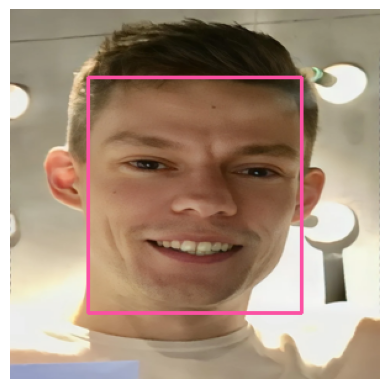

In [12]:

# annotate
annotator = BoxAnnotator()
annotated_frame = annotator.annotate(scene=image_np.copy(), detections=detections)

# display
plt.imshow(annotated_frame)
plt.axis("off")
plt.show()

In [31]:
#import math
from datasets import Dataset

celebrities = {'0':'Sergey Semyonovich Sobyanin', '1':'Khabib Abdulmanapovich Nurmagomedov', '2':'Timur Ildarovich Yunusov', '3':'Sergey Vladimirovich Shnurov', '4':'Vasiliy Mikhaylovich Vakulenko', '5':'Philipp Bedros Kirkorov', '6':'Ivan Andreyevich Urgant', '7':'Sergey Yevgenevich Zhukov', '8':'Aleksandr Vladimirovich Revva', '9':'Yury Aleksandrovich Dud'}
def crop_image(img_path, ds:Dataset, target_size=(300, 300)):
    img = Image.open(img_path).convert("RGB")
    img_np = np.array(img)
    results = model(img_np)
    detections = Detections.from_ultralytics(results[0])
    img_path = img_path.split("\\")
    img.save(f"celebrities\\{(int(img_path[-1][:-4]) + 1):04}_source.png")
    for box, conf, class_id in zip(detections.xyxy, detections.confidence, detections.class_id):
        img = img.crop(box)
        img = img.resize(target_size)
        
        img.save(f"celebrities\\{(int(img_path[-1][:-4]) + 1):04}_crop.png")
        item = {"file_names": [f"{(int(img_path[-1][:-4]) + 1):04}_source.png", f"{(int(img_path[-1][:-4]) + 1):04}_crop.png"], "label": celebrities[img_path[-2]]}
        ds.add_item(item)

In [38]:
!pip install -U "huggingface_hub[cli]"
!pip install datasets[vision]


   -------------------- ------------------- 1/2 [InquirerPy]
   -------------------- ------------------- 1/2 [InquirerPy]
   ---------------------------------------- 2/2 [InquirerPy]



In [45]:
#hf auth login

формат {"file_names": ["0001_source.png", "0001_crop.png"], "label": "0"}

In [46]:
celebrities = Dataset.from_dict({"file_names": [], "label": []})
celebrities.info.dataset_name = "celebrities"
celebrities.add_item({"file_names": ["0001_source.png", "0001_crop.png"], "label": "0"})


Dataset({
    features: ['file_names', 'label'],
    num_rows: 1
})

In [49]:
celebrities[0]

IndexError: Invalid key: 0 is out of bounds for size 0

In [ ]:
with open("metadatatest.jsonl", "w+") as f:
    crop_image(image_path, celebrities)


0: 640x640 1 FACE, 40.4ms
Speed: 7.4ms preprocess, 40.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
celebrities.info

DatasetInfo(description='', citation='', homepage='', license='', features={'file_names': Value('null'), 'label': Value('null')}, post_processed=None, supervised_keys=None, builder_name=None, dataset_name=None, config_name=None, version=None, splits=None, download_checksums=None, download_size=None, post_processing_size=None, dataset_size=None, size_in_bytes=None)

In [ ]:
import os

with open("Dataset\\metadata.jsonl", "w+") as f:
    for dirname, _, filenames in os.walk('Data'):
        for filename in filenames:
            print(dirname[-6:] + f'\\{filename}')
            crop_image(dirname[-6:] + f'\\{filename}', celebrities)

Data\0\0.png

0: 640x640 1 FACE, 38.9ms
Speed: 2.7ms preprocess, 38.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Data\0\1.png

0: 640x640 1 FACE, 35.8ms
Speed: 3.1ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Data\0\10.png

0: 640x640 1 FACE, 35.8ms
Speed: 2.9ms preprocess, 35.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Data\0\11.png

0: 640x640 1 FACE, 35.6ms
Speed: 2.7ms preprocess, 35.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Data\0\12.png

0: 640x640 1 FACE, 38.5ms
Speed: 2.7ms preprocess, 38.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Data\0\13.png

0: 640x640 1 FACE, 34.7ms
Speed: 2.6ms preprocess, 34.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Data\0\14.png

0: 640x640 1 FACE, 36.6ms
Speed: 2.9ms preprocess, 36.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Data\0\15.png

0: 640x640 1 FACE, 35

перекладываем датасет в zip

Resolving data files:   0%|          | 0/2001 [00:00<?, ?it/s]

ArrowInvalid: JSON parse error: Missing a name for object member. in row 0

In [ ]:
!pip install umap-learn

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -------------------------- ------------- 1.8/2.7 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 7.6 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.1 MB 16.8 MB/s eta 0:00:03
   ------ --------------------------------- 5.8/38.1 MB 14.1 MB/s eta 0:00:03
   --------- ------------------------------ 9.2/38.1 MB 15.0 MB/s eta 0:00:02
   ------------- -------------------------- 12.8/38.1 MB 15.5 MB/s eta 0:00:02
   ---------------- ----------------------- 15.5/38.1 MB 15.2 MB/s eta 0:00:02
   -------------------- ------------------- 19.4/38.1 MB 15.7 MB/s eta 0:00:02
   ----------------------- ---------------- 22.8/38.1 MB 15.7 MB/s eta 0:00:01
   --------------------------- ------------ 26.2/38.1 MB 15.5 MB/s eta 0:00:01
   ------------------------------ --------- 29.4/38.1 MB 15.4 MB/s eta 0:00:01
   